In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv
/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix img.png



  <h1 style="color:#000000;">My First Notebook on Kaggle</h1>
  <p>Welcome to my first notebook on Kaggle! I'm excited to embark on this journey of exploration and learning.</p>
  <p>Your feedback means a lot to me. Whether it's suggestions for improvement, questions, or just a friendly hello, I'd love to hear from you. </p>
  <p>Any suggestions on standard practices,formatting, standardising and annotations would help a lot.</p>
  <p>Thank you for all your help!</p>
</div>


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
#importing data
df = pd.read_csv("/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

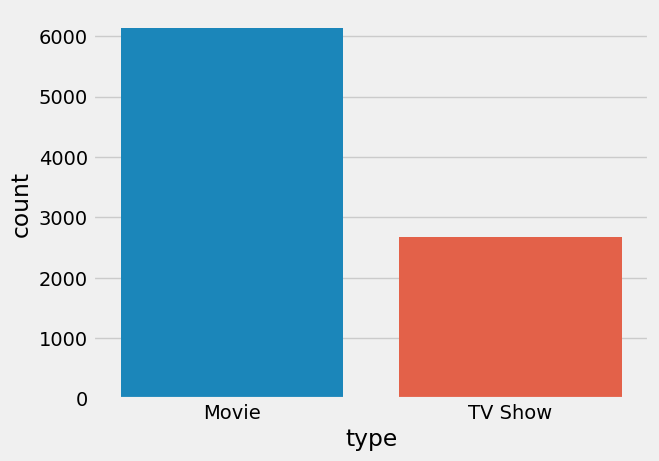

In [10]:
#SHows in each type
plt.style.available
plt.style.use('fivethirtyeight')
sns.countplot(x = df['type'], data =df)
plt.show()

In [11]:
#top 10 directors with most shows
df['director']=df['director'].fillna("Unknown")
top_10dir= df[df['director']!="Unknown"]['director'].value_counts()[:10].reset_index()
top_10dir

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


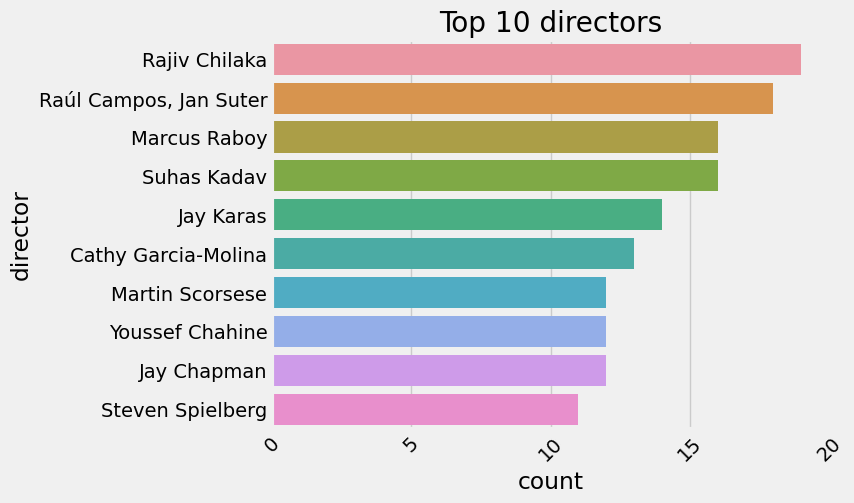

In [12]:
sns.barplot(y= top_10dir['director'],x= top_10dir['count'],orient='h')
labels = list(range(0,25,5))
plt.xticks(ticks = labels,rotation = 45)
plt.title("Top 10 directors")
plt.show()


In [13]:
df['date_added']= df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added']) #infer_datetime_format= True
df['Year'] = df['date_added'].dt.year
df['Year'] =df['Year'].astype(str)
df['Year'] =df['Year'].str.replace('.0','')
df['Year'] =df['Year'].str.replace('nan','0')

In [14]:
df['Year'] =df['Year'].astype(int)

In [15]:
df.sort_values(by= "Year",inplace = True)
df.reset_index(drop = True,inplace = True)

In [16]:
year_cum = df.groupby('Year')['Year'].count()

In [17]:
year_cum.name = 'Count'

In [18]:
year_cum = year_cum.reset_index()


In [19]:
year_cum['cum_sum']=year_cum['Count'].cumsum()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


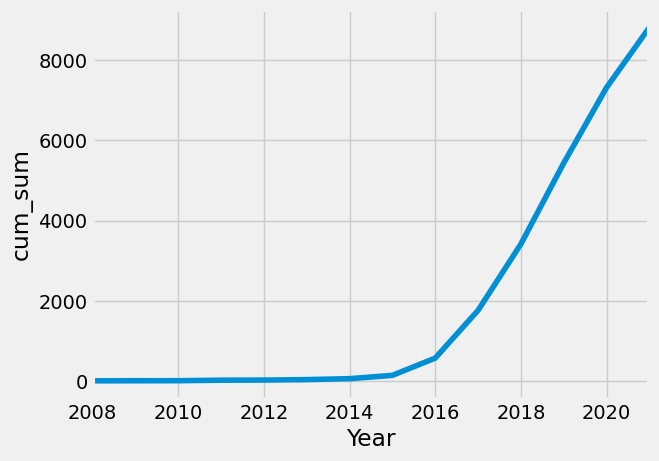

In [20]:
# Cumulative movies/shows added each yaer
sns.lineplot(x= year_cum['Year'], y = year_cum['cum_sum'],markers = True)
plt.xlim(year_cum['Year'].iloc[1],year_cum['Year'].iloc[-1])
plt.show()

In [21]:
def cats(x):
    split_str = x.split(',')
    split_str = [i.strip().lower() for i in split_str]
    i = df[df['listed_in']== x].index
    for j in range(len(split_str)):
        df.loc[i,split_str[j]] = 1

In [22]:
df['listed_in'].apply(cats)

0       None
1       None
2       None
3       None
4       None
        ... 
8802    None
8803    None
8804    None
8805    None
8806    None
Name: listed_in, Length: 8807, dtype: object

In [23]:
all_cols = df.columns.tolist()
all_cols_cats = ["kids' tv",
 'international tv shows',
 'spanish-language tv shows',
 'tv comedies',
 'docuseries',
 'anime series',
 'crime tv shows',
 'classic & cult tv',
 'british tv shows',
 'tv dramas',
 'tv action & adventure',
 'tv sci-fi & fantasy',
 'dramas',
 'independent movies',
 'thrillers',
 'stand-up comedy & talk shows',
 'horror movies',
 'international movies',
 'cult movies',
 'sports movies',
 'children & family movies',
 'faith & spirituality',
 'documentaries',
 'comedies',
 'teen tv shows',
 'music & musicals',
 'tv mysteries',
 'tv thrillers',
 'stand-up comedy',
 'movies',
 'action & adventure',
 'sci-fi & fantasy',
 'tv horror',
 'science & nature tv',
 'romantic tv shows',
 'lgbtq movies',
 'romantic movies',
 'korean tv shows',
 'reality tv',
 'tv shows',
 'classic movies',
 'anime features']
cols_to_keep = ["kids' tv",
 
 'tv comedies',
 'docuseries',
 'anime series',
 'crime tv shows',
 'classic & cult tv',
 'tv dramas',
 'tv action & adventure',
 'tv sci-fi & fantasy',
 'independent movies',
 'thrillers',
 'stand-up comedy & talk shows',
 'horror movies',

 'cult movies',
 'sports movies',
 'children & family movies',
 'faith & spirituality',
 'documentaries',
 'comedies',
 'teen tv shows',
 'music & musicals',
 'tv mysteries',
 'tv thrillers',
 'stand-up comedy',
 'action & adventure',
 'sci-fi & fantasy',
 'tv horror',
 'science & nature tv',
 'romantic tv shows',
 'lgbtq movies',
 'romantic movies',
 'korean tv shows',
 'reality tv',
 'classic movies',
 'anime features']

cols_drop = [i for i in all_cols_cats if not (i in cols_to_keep)]
cols_drop

['international tv shows',
 'spanish-language tv shows',
 'british tv shows',
 'dramas',
 'international movies',
 'movies',
 'tv shows']

In [24]:
df.drop(columns=cols_drop, inplace = True)

In [25]:
cats_data = df[cols_to_keep].sum()
df_cats = pd.DataFrame(cats_data).reset_index()

In [26]:
df_cats.columns = ['Cat','Count']
df_cats

,Cat,Count
0,kids' tv,451.0
1,tv comedies,581.0
2,docuseries,395.0
3,anime series,176.0
4,crime tv shows,470.0
5,classic & cult tv,28.0
6,tv dramas,763.0
7,tv action & adventure,168.0
8,tv sci-fi & fantasy,84.0
9,independent movies,756.0


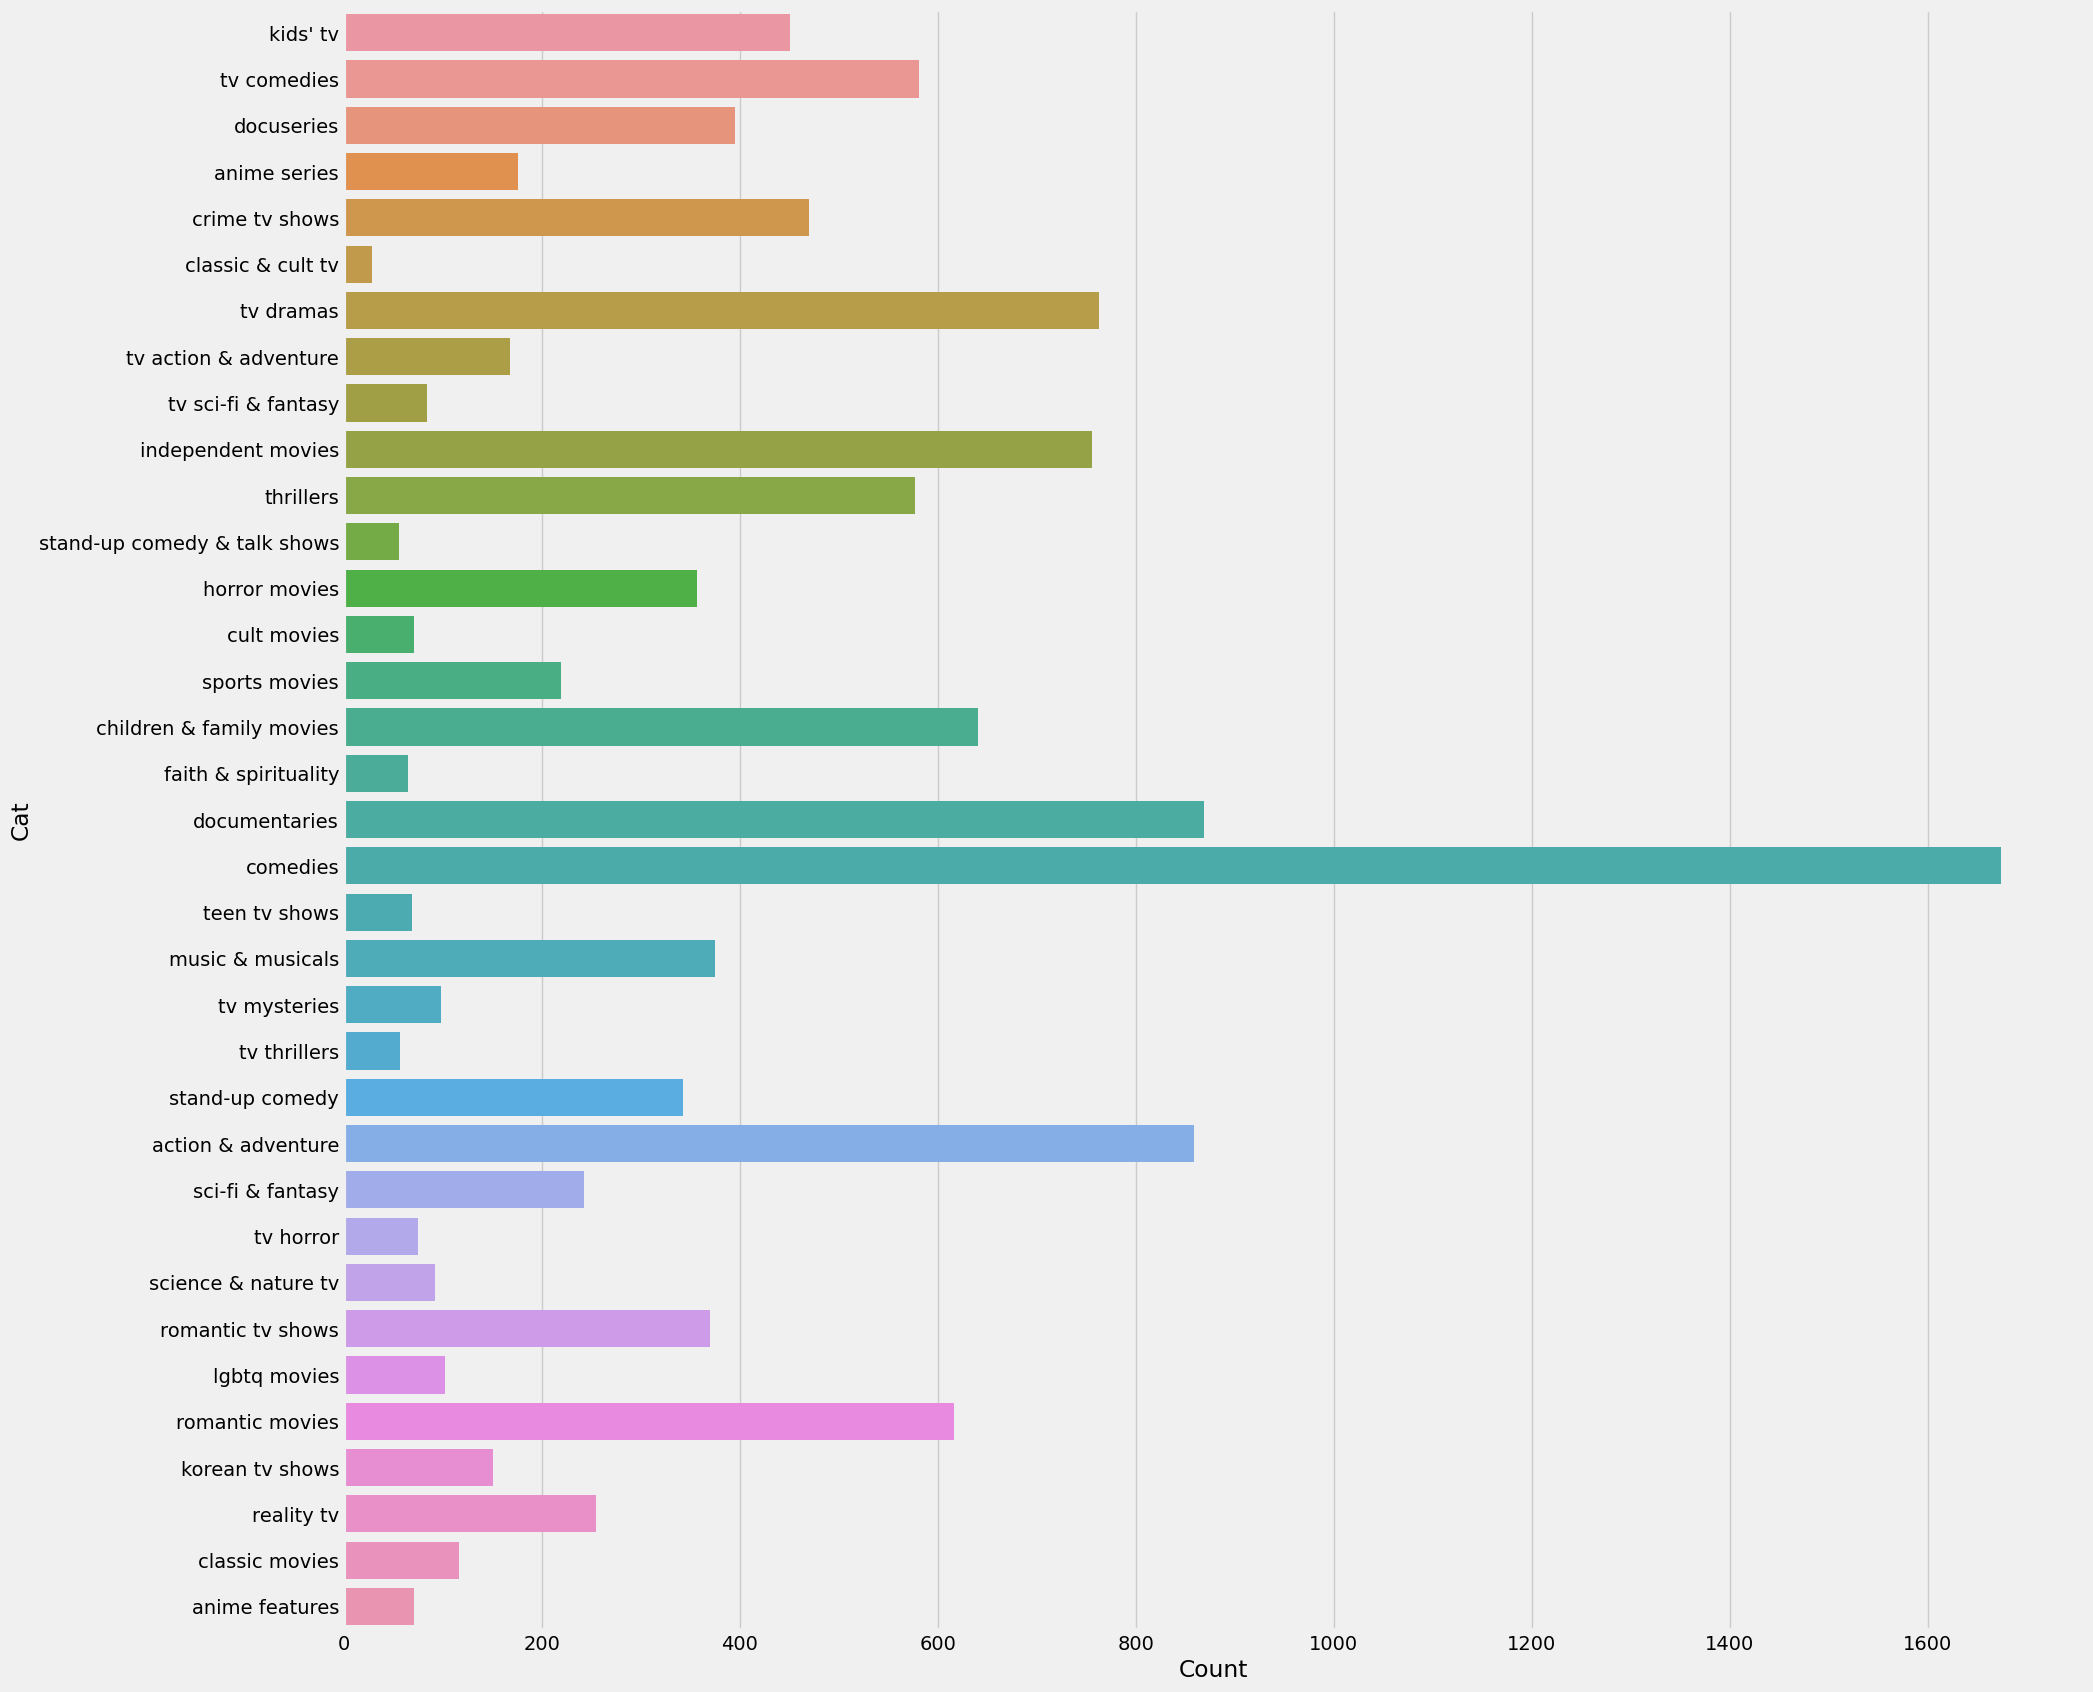

In [27]:
#cateogry of movies
plt.figure(figsize= (20,20))
sns.barplot(x = df_cats['Count'], y= df_cats['Cat'],orient = 'h')
plt.show()

In [28]:
df['rating'] = df['rating'].str.replace('84 min','')
df['rating'] = df['rating'].str.replace('66 min','')
df['rating'] = df['rating'].str.replace('74 min','')

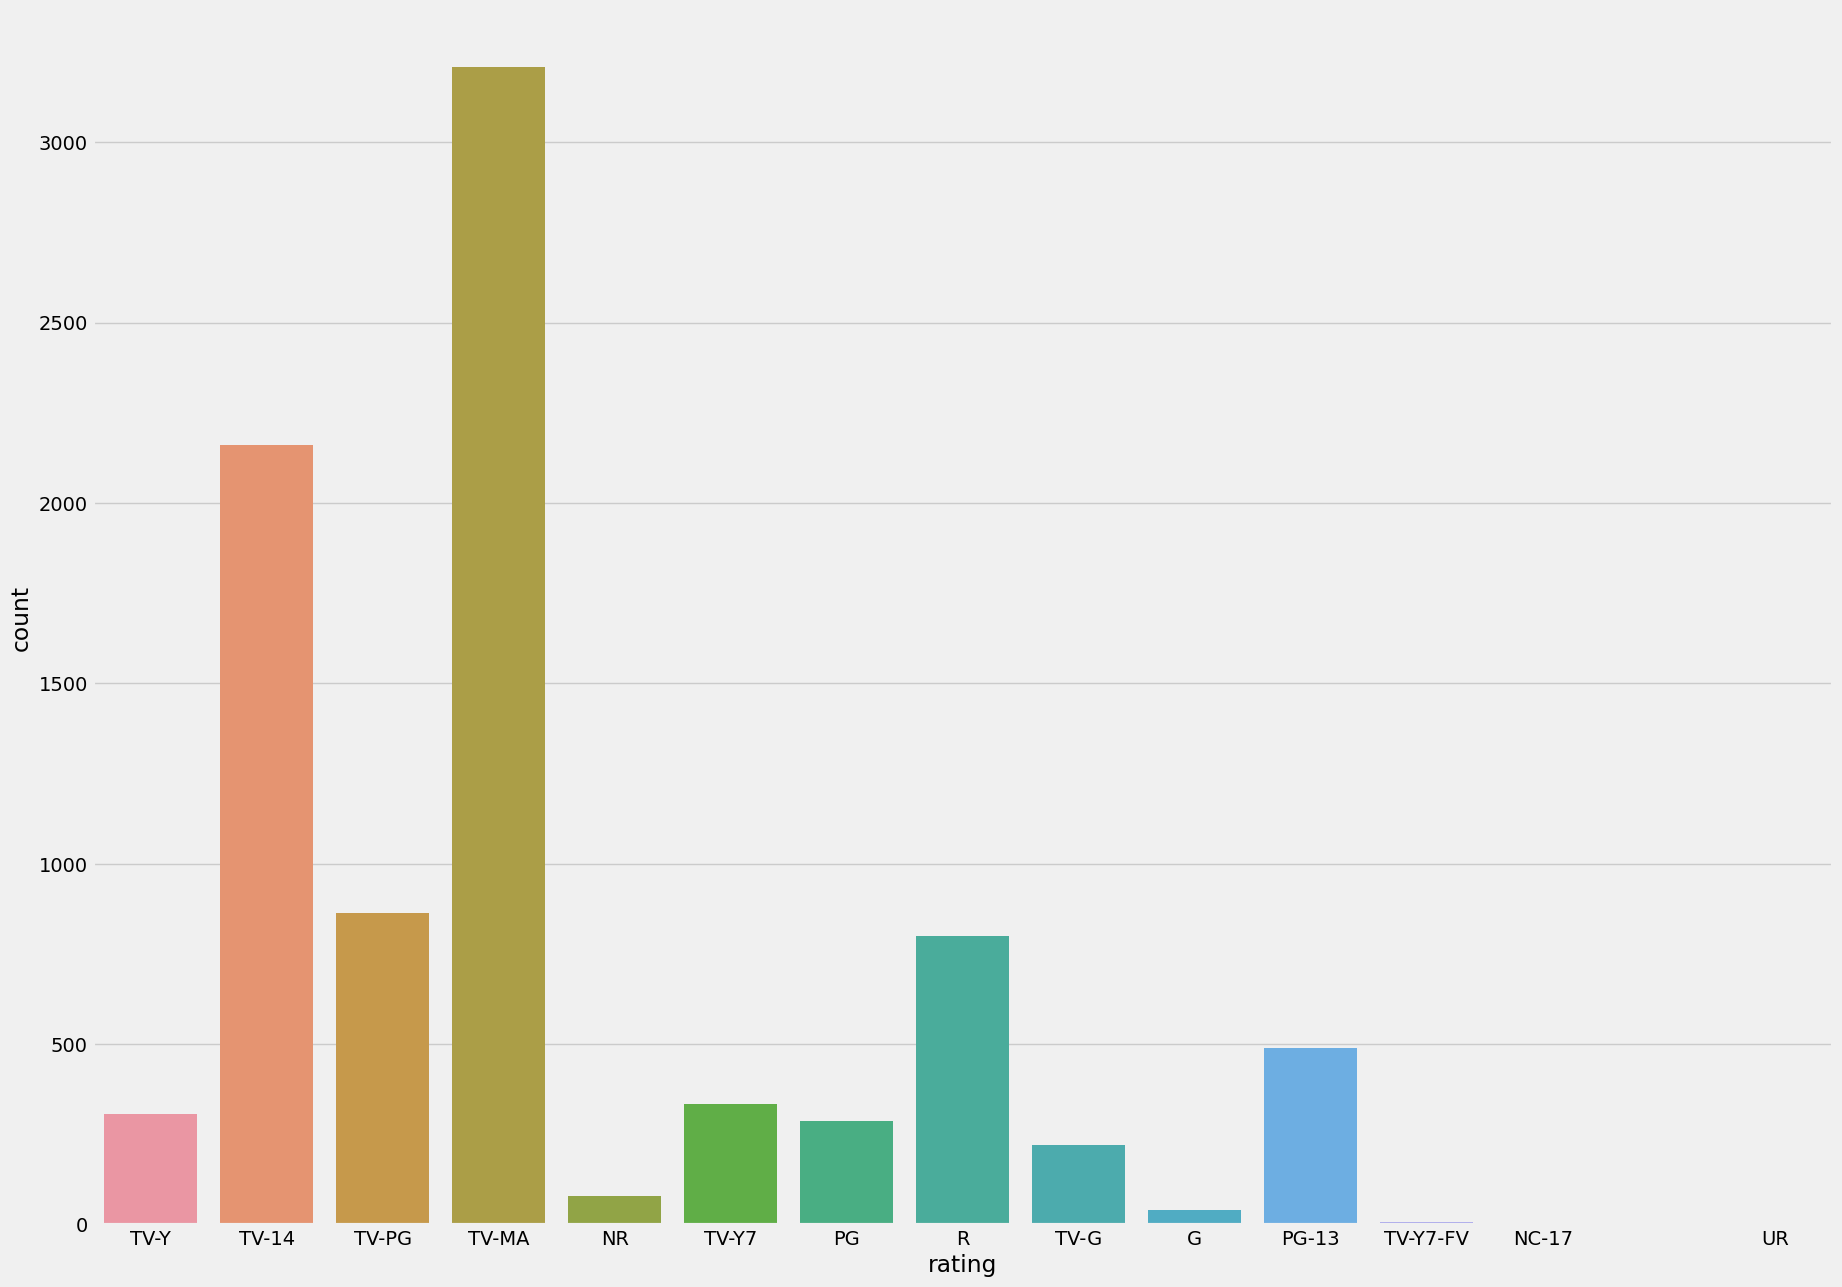

In [29]:
#Ratings
plt.figure(figsize= (20,15))
sns.countplot(x= df['rating'], data = df)
plt.show()

In [30]:
cast = dict()
def cast_func(x):
    split_str = str(x).split(',')
    split_str = [i.strip().lower() for i in split_str]
    for i in range(len(split_str)):
        if split_str[i] in cast.keys():
            cast[split_str[i]]+=1
        else:
            cast[split_str[i]] = 1

In [31]:
df['cast'].apply(cast_func)

0       None
1       None
2       None
3       None
4       None
        ... 
8802    None
8803    None
8804    None
8805    None
8806    None
Name: cast, Length: 8807, dtype: object

In [32]:
all_values = list(cast.values())
all_values.sort(reverse = True)

In [33]:
top_10_actors = [key for key, value in cast.items() if cast[key]>25 and key != 'nan']

In [34]:
top_10_actors_dict = {key: cast[key] for key, value in cast.items() if key in top_10_actors}

In [35]:
df_cast = pd.DataFrame(list(top_10_actors_dict.items()),columns = ['Cast','#shows'])


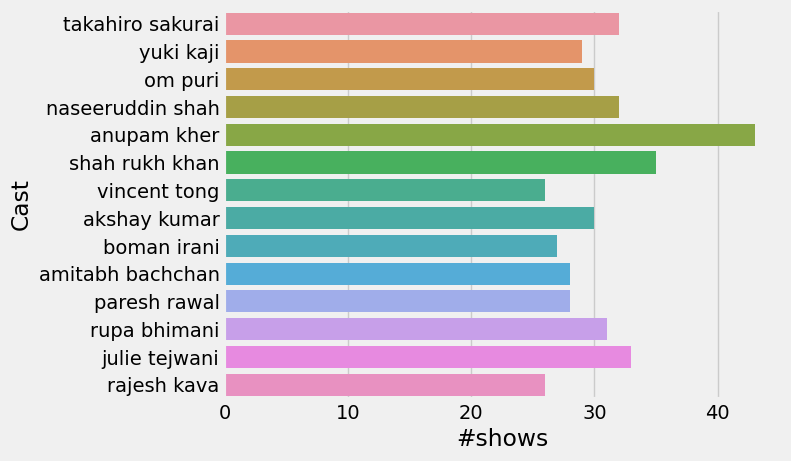

In [36]:
#top actors
sns.barplot(x= df_cast['#shows'], y = df_cast['Cast'], orient='h')
plt.show()